In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

batch_size = 10

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    'D:/NDT/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    'D:/NDT/val',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    'D:/NDT/test',
    shuffle=False,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1402 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 307 images belonging to 3 classes.


In [3]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify input shape and number of classes
input_shape = (224, 224, 3)  # Adjust input shape as needed
num_classes = 3  # Adjust for your classification task

# Load the InceptionV3 model with pre-trained ImageNet weights
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

# Add an additional fully connected layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
# Add an additional fully connected layer
x = Dense(512, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with SGD optimizer and a specific learning rate
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.95), loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model with your dataset
# model.fit(train_generator, epochs=epochs, validation_data=val_generator)
model.fit(train_generator, epochs=40, batch_size=10, validation_data=validation_generator)

# Make sure to load your dataset and train the model with the appropriate data and labels.
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/40
141/141 [==============================] - 72s 479ms/step - loss: 0.5523 - accuracy: 0.7611 - val_loss: 0.1040 - val_accuracy: 0.9933
Epoch 2/40
141/141 [==============================] - 61s 433ms/step - loss: 0.1265 - accuracy: 0.9608 - val_loss: 0.0556 - val_accuracy: 0.9933
Epoch 3/40
141/141 [==============================] - 61s 434ms/step - loss: 0.0892 - accuracy: 0.9765 - val_loss: 0.0538 - val_accuracy: 0.9933
Epoch 4/40
141/141 [==============================] - 61s 434ms/step - loss: 0.0613 - accuracy: 0.9857 - val_loss: 0.0319 - val_accuracy: 0.9933
Epoch 5/40
141/141 [==============================] - 61s 434ms/step - loss: 0.0596 - accuracy: 0.9843 - val_loss: 0.0277 - val_accuracy: 0.9933
Epoch 6/40
141/141 [==============================] - 61s 435ms/step - loss: 0.0389 - accuracy: 0.9893 - val_loss: 0.0391 - val_accuracy: 0.9933
Epoch 7/40
141/141 [==============================] - 61s 437ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0445 - val_ac

In [4]:
tf.keras.models.save_model(model,'Test10.hdf5')


C:\Users\swapn\AppData\Local\Temp\ipykernel_2512\926090601.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'Test10.hdf5')


31/31 [==============================] - 13s 373ms/step - loss: 0.0116 - accuracy: 0.9967
Test accuracy: 99.67%


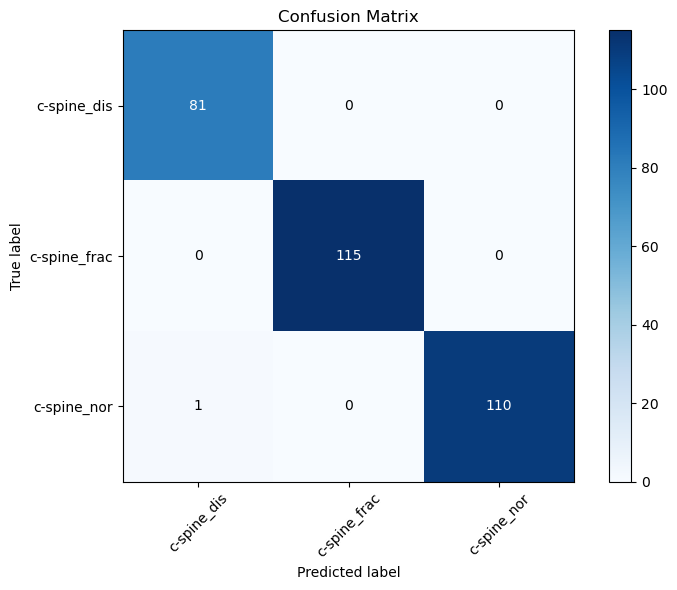

In [5]:
model = tf.keras.models.load_model('Test10.hdf5')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
# Get true labels
true_labels = test_generator.classes

# Get class names
class_names = list(test_generator.class_indices.keys())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and tick marks
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display values in each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()